<a href="https://colab.research.google.com/github/romerik/fcc_Machine_Learning/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-10-02 12:19:11--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2021-10-02 12:19:12 (4.63 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
#Shape of the dataset
dataset.shape

(1338, 7)

In [4]:
#Informations about our dataset column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So there is no missing value in the dataset

In [5]:
#Some statistique about our dataset
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
dataset.value_counts()

age  sex     bmi   children  smoker  region     expenses
19   male    30.6  0         no      northwest  1639.56     2
30   male    37.4  3         no      northeast  5428.73     1
             38.8  1         no      southeast  18963.17    1
             44.2  2         no      southeast  4266.17     1
31   female  21.8  0         no      northwest  4134.08     1
                                                           ..
47   male    36.2  0         yes     southeast  41676.08    1
                   1         no      southwest  8068.19     1
             38.9  2         yes     southeast  44202.65    1
             47.5  1         no      southeast  8083.92     1
18   female  20.8  0         no      southeast  1607.51     1
Length: 1337, dtype: int64

In [7]:
dataset.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


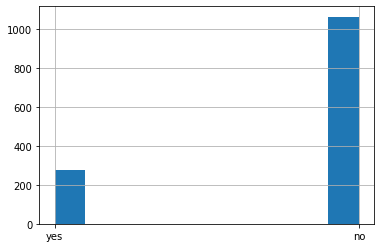

In [8]:
dataset.smoker.hist()

# Transform categorical data to numeric

In [9]:
dataset.sex.replace(['female','male'],[0,1], inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [10]:
dataset.smoker.replace(['no','yes'],[0,1], inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [11]:
dataset.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [12]:
dataset.region.replace(['northeast','northwest','southeast','southwest'],[0,1,2,3], inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [13]:
dataset.info() #informations about type of our features now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


We haven't still object

# Train and Test data

In [14]:
train_dataset = dataset.iloc[:int(0.8*dataset.shape[0])]
test_dataset = dataset.iloc[int(0.8*dataset.shape[0]):]

In [15]:
print(train_dataset)
print(test_dataset)

      age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       3  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       1  21984.47
4      32    1  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1065   42    0  25.3         1       0       3   7045.50
1066   48    1  37.3         2       0       2   8978.19
1067   39    1  42.7         0       0       0   5757.41
1068   63    1  21.7         1       0       1  14349.85
1069   54    0  31.9         1       0       2  10928.85

[1070 rows x 7 columns]
      age  sex   bmi  children  smoker  region  expenses
1070   37    1  37.1         1       1       2  39871.70
1071   63    1  31.4         0       0       0  13974.46
1072   21    1  31.3         0       0       1   1909.53
1073   54    0  28.9         2       0       0  12096.65
1074  

In [16]:
print(train_dataset.shape[0]/dataset.shape[0])
print(test_dataset.shape[0]/dataset.shape[0])

0.7997010463378177
0.20029895366218237


In [17]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [18]:
print(train_labels)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1065     7045.50
1066     8978.19
1067     5757.41
1068    14349.85
1069    10928.85
Name: expenses, Length: 1070, dtype: float64


In [19]:
print(test_labels)

1070    39871.70
1071    13974.46
1072     1909.53
1073    12096.65
1074    13204.29
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 268, dtype: float64


# Normalization

In [20]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
age,39.551402,14.141959
sex,0.510280,0.500128
bmi,30.784953,6.085046
children,1.075701,1.191986
smoker,0.200935,0.400887
region,1.515888,1.107517


Our data is so scattered

In [21]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

This calculates the mean and variance, and stores them in the layer.

In [22]:
print(normalizer.mean.numpy())

[[39.551403    0.5102803  30.78495     1.0757008   0.20093456  1.5158879 ]]


# Build the model

In [39]:
model = tf.keras.Sequential([
      normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dense(2),
    layers.Dense(1),
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mae', 'mse'])

# Training

In [59]:
model.fit(
    train_dataset, train_labels, 
    epochs=20,
    validation_split = 0.2)

Epoch 1/20
27/27 [==============================] - 0s 4ms/step - loss: 3400.3008 - mae: 3400.3008 - mse: 46144856.0000 - val_loss: 3897.1331 - val_mae: 3897.1331 - val_mse: 58399012.0000
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 3316.3274 - mae: 3316.3274 - mse: 47289524.0000 - val_loss: 3866.4155 - val_mae: 3866.4155 - val_mse: 58079280.0000
Epoch 3/20
27/27 [==============================] - 0s 2ms/step - loss: 3308.4565 - mae: 3308.4565 - mse: 44811856.0000 - val_loss: 3892.3262 - val_mae: 3892.3262 - val_mse: 55737812.0000
Epoch 4/20
27/27 [==============================] - 0s 2ms/step - loss: 3306.7725 - mae: 3306.7725 - mse: 46509260.0000 - val_loss: 3918.9951 - val_mae: 3918.9951 - val_mse: 60876108.0000
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 3298.0793 - mae: 3298.0793 - mse: 46680116.0000 - val_loss: 3882.9832 - val_mae: 3882.9832 - val_mse: 58902840.0000
Epoch 6/20
27/27 [==============================] - 0s 3ms/s

9/9 - 0s - loss: 3479.0166 - mae: 3479.0166 - mse: 46889456.0000
Testing set Mean Abs Error: 3479.02 expenses
You passed the challenge. Great job!


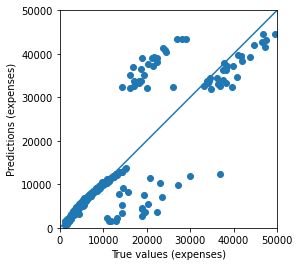

In [60]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
